<a href="https://colab.research.google.com/github/MarUz97/ML_for_Neuro/blob/main/TestContraste2015_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos

In [55]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
import scipy.stats as ss

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
import networkx as nx

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from scipy.stats import ttest_ind
from scipy.stats import t

In [56]:
control2015_alpha = pd.read_table('/content/drive/MyDrive/power_alpha_control.csv', sep=',"', header=None)
control2015_alpha = control2015_alpha.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
control2015_alpha = header.append(control2015_alpha)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [57]:
for i, col in enumerate(control2015_alpha.columns):
  control2015_alpha.iloc[:, i] = control2015_alpha.iloc[:, i].str.replace('"', '')
control2015_alpha.columns = control2015_alpha.iloc[0] 
control2015_alpha = control2015_alpha[1:]
control2015_alpha.head()
control2015_alpha = control2015_alpha.apply(pd.to_numeric)

In [58]:
control2019_alpha = pd.read_table('/content/drive/MyDrive/power_alpha_control_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
control2019_alpha = header.append(control2019_alpha)
control2019_alpha.columns = control2019_alpha.iloc[0] 
control2019_alpha = control2019_alpha[1:]
control2019_alpha = control2019_alpha.apply(pd.to_numeric)

In [59]:
control2015_alpha_mean = control2015_alpha.mean()
control2019_alpha_mean = control2019_alpha.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [63]:
binge2015_alpha = pd.read_table('/content/drive/MyDrive/power_alpha_binge.csv', sep=',"', header=None)
binge2015_alpha = binge2015_alpha.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
binge2015_alpha = header.append(binge2015_alpha)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [64]:
for i, col in enumerate(binge2015_alpha.columns):
  binge2015_alpha.iloc[:, i] = binge2015_alpha.iloc[:, i].str.replace('"', '')
binge2015_alpha.columns = binge2015_alpha.iloc[0] 
binge2015_alpha = binge2015_alpha[1:]
binge2015_alpha.head()
binge2015_alpha = binge2015_alpha.apply(pd.to_numeric)

In [65]:
binge2019_alpha = pd.read_table('/content/drive/MyDrive/power_alpha_binge_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
binge2019_alpha = header.append(binge2019_alpha)
binge2019_alpha.columns = binge2019_alpha.iloc[0] 
binge2019_alpha = binge2019_alpha[1:]
binge2019_alpha = binge2019_alpha.apply(pd.to_numeric)

In [66]:
binge2015_alpha_mean = binge2015_alpha.mean()
binge2019_alpha_mean = binge2019_alpha.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [70]:
control2015_beta = pd.read_table('/content/drive/MyDrive/power_beta_control.csv', sep=',"', header=None)
control2015_beta = control2015_beta.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
control2015_beta = header.append(control2015_beta)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [71]:
for i, col in enumerate(control2015_beta.columns):
  control2015_beta.iloc[:, i] = control2015_beta.iloc[:, i].str.replace('"', '')
control2015_beta.columns = control2015_beta.iloc[0] 
control2015_beta = control2015_beta[1:]
control2015_beta.head()
control2015_beta = control2015_beta.apply(pd.to_numeric)

In [72]:
control2019_beta = pd.read_table('/content/drive/MyDrive/power_beta_control_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
control2019_beta = header.append(control2019_beta)
control2019_beta.columns = control2019_beta.iloc[0] 
control2019_beta = control2019_beta[1:]
control2019_beta = control2019_beta.apply(pd.to_numeric)

In [73]:
control2015_beta_mean = control2015_beta.mean()
control2019_beta_mean = control2019_beta.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [77]:
binge2015_beta = pd.read_table('/content/drive/MyDrive/power_beta_binge.csv', sep=',"', header=None)
binge2015_beta = binge2015_beta.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
binge2015_beta = header.append(binge2015_beta)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [78]:
for i, col in enumerate(binge2015_beta.columns):
  binge2015_beta.iloc[:, i] = binge2015_beta.iloc[:, i].str.replace('"', '')
binge2015_beta.columns = binge2015_beta.iloc[0] 
binge2015_beta = binge2015_beta[1:]
binge2015_beta.head()
binge2015_beta = binge2015_beta.apply(pd.to_numeric)

In [79]:
binge2019_beta = pd.read_table('/content/drive/MyDrive/power_beta_binge_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
binge2019_beta = header.append(binge2019_beta)
binge2019_beta.columns = binge2019_beta.iloc[0] 
binge2019_beta = binge2019_beta[1:]
binge2019_beta = binge2019_beta.apply(pd.to_numeric)

In [83]:
binge2015_beta_mean = binge2015_beta.mean()
binge2019_beta_mean = binge2019_beta.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [87]:
control2015_gamma = pd.read_table('/content/drive/MyDrive/power_gamma_control.csv', sep=',"', header=None)
control2015_gamma = control2015_gamma.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
control2015_gamma = header.append(control2015_gamma)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [88]:
for i, col in enumerate(control2015_gamma.columns):
  control2015_gamma.iloc[:, i] = control2015_gamma.iloc[:, i].str.replace('"', '')
control2015_gamma.columns = control2015_gamma.iloc[0] 
control2015_gamma = control2015_gamma[1:]
control2015_gamma.head()
control2015_gamma = control2015_gamma.apply(pd.to_numeric)

In [89]:
control2019_gamma = pd.read_table('/content/drive/MyDrive/power_gamma_control_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
control2019_gamma = header.append(control2019_gamma)
control2019_gamma.columns = control2019_gamma.iloc[0] 
control2019_gamma = control2019_gamma[1:]
control2019_gamma = control2019_gamma.apply(pd.to_numeric)

In [90]:
control2015_gamma_mean = control2015_gamma.mean()
control2019_gamma_mean = control2019_gamma.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [106]:
binge2015_gamma = pd.read_table('/content/drive/MyDrive/power_gamma_binge.csv', sep=',"', header=None)
binge2015_gamma = binge2015_gamma.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
binge2015_gamma = header.append(binge2015_gamma)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [107]:
for i, col in enumerate(binge2015_gamma.columns):
  binge2015_gamma.iloc[:, i] = binge2015_gamma.iloc[:, i].str.replace('"', '')
binge2015_gamma.columns = binge2015_gamma.iloc[0] 
binge2015_gamma = binge2015_gamma[1:]
binge2015_gamma.head()
binge2015_gamma = binge2015_gamma.apply(pd.to_numeric)

In [98]:
binge2019_gamma = pd.read_table('/content/drive/MyDrive/power_gamma_binge_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
binge2019_gamma = header.append(binge2019_gamma)
binge2019_gamma.columns = binge2019_gamma.iloc[0] 
binge2019_gamma = binge2019_gamma[1:]
binge2019_gamma = binge2019_gamma.apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [108]:
binge2015_gamma_mean = binge2015_gamma.mean()
binge2019_gamma_mean = binge2019_gamma.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [116]:
control2015_theta = pd.read_table('/content/drive/MyDrive/power_theta_control.csv', sep=',"', header=None)
control2015_theta = control2015_theta.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
control2015_theta = header.append(control2015_theta)

In [117]:
for i, col in enumerate(control2015_theta.columns):
  control2015_theta.iloc[:, i] = control2015_theta.iloc[:, i].str.replace('"', '')
control2015_theta.columns = control2015_theta.iloc[0] 
control2015_theta = control2015_theta[1:]
control2015_theta.head()
control2015_theta = control2015_theta.apply(pd.to_numeric)

In [121]:
control2019_theta = pd.read_table('/content/drive/MyDrive/power_theta_control_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
control2019_theta = header.append(control2019_theta)
control2019_theta.columns = control2019_theta.iloc[0] 
control2019_theta = control2019_theta[1:]
control2019_theta = control2019_theta.apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [122]:
control2015_theta_mean = control2015_theta.mean()
control2019_theta_mean = control2019_theta.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

In [128]:
binge2015_theta = pd.read_table('/content/drive/MyDrive/power_theta_binge.csv', sep=',"', header=None)
binge2015_theta = binge2015_theta.iloc[1: , :]
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
binge2015_theta = header.append(binge2015_theta)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [129]:
for i, col in enumerate(binge2015_theta.columns):
  binge2015_theta.iloc[:, i] = binge2015_theta.iloc[:, i].str.replace('"', '')
binge2015_theta.columns = binge2015_theta.iloc[0] 
binge2015_theta = binge2015_theta[1:]
binge2015_theta.head()
binge2015_theta = binge2015_theta.apply(pd.to_numeric)

In [131]:
binge2019_theta = pd.read_table('/content/drive/MyDrive/power_theta_binge_new.csv', sep=';', header=None)
header = pd.read_table('/content/drive/MyDrive/header.txt', sep=',"', header=None)
header = np.transpose(header)
for i, col in enumerate(header.columns):
  header.iloc[:, i] = header.iloc[:, i].str.replace('"', '')
binge2019_theta = header.append(binge2019_theta)
binge2019_theta.columns = binge2019_theta.iloc[0] 
binge2019_theta = binge2019_theta[1:]
binge2019_theta = binge2019_theta.apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [132]:
binge2015_theta_mean = binge2015_theta.mean()
binge2019_theta_mean = binge2019_theta.mean()
x = list(range(0, 78))
labels = []
for i in x :
  i = i+1
  i = str(i)
  labels.append(i)

# Gráficas


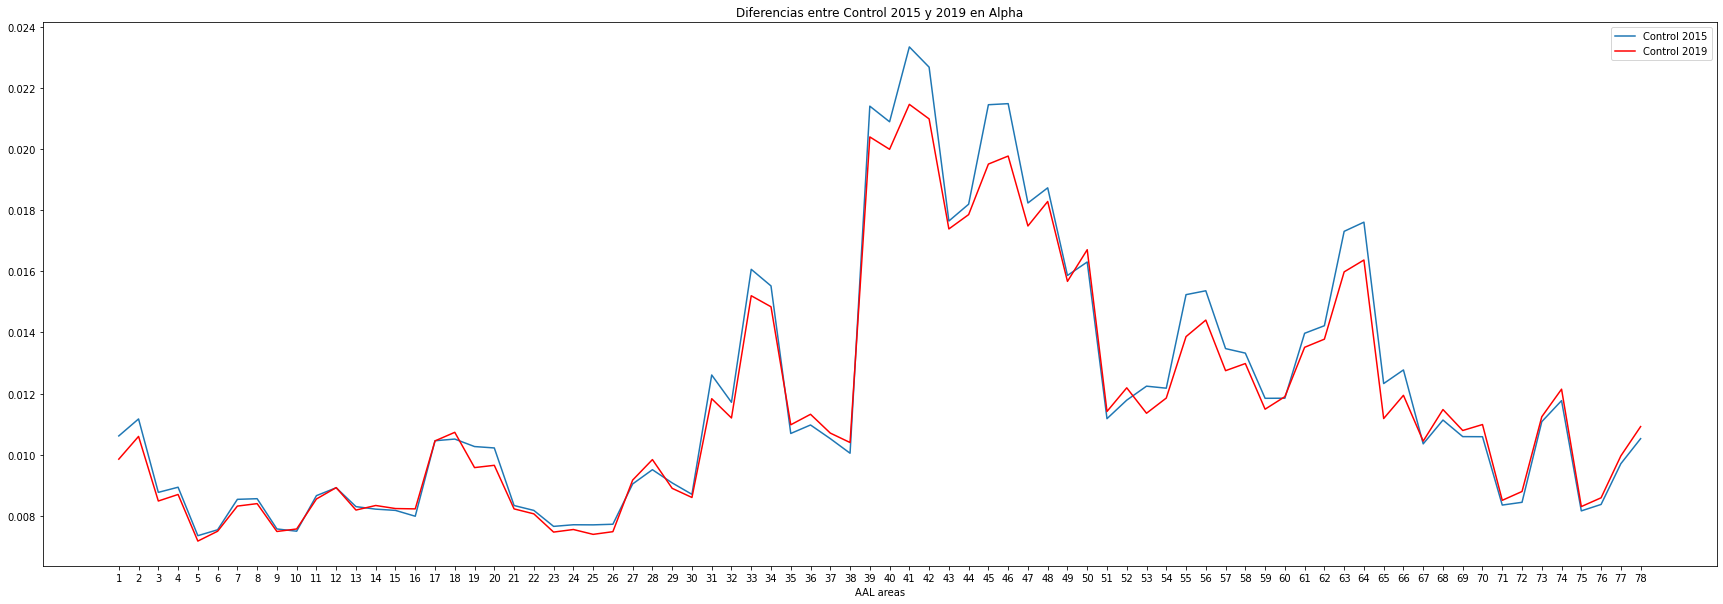

In [153]:
control2015_alpha_mean.plot(figsize=(30,10))
control2019_alpha_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Control 2015', 'Control 2019'])
plt.title('Diferencias entre Control 2015 y 2019 en Alpha')
plt.show()

In [141]:
print('T-TEST DE DIFERENCIA ENTRE ALPHA CONTROL 2015 Y ALPHA CONTROL 2019\n')
interfer = 0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(control2015_alpha.iloc[:,i], control2019_alpha.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {control2015_alpha.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguno de los areas')

T-TEST DE DIFERENCIA ENTRE ALPHA CONTROL 2015 Y ALPHA CONTROL 2019

No hay diferencias entre ninguno de los areas


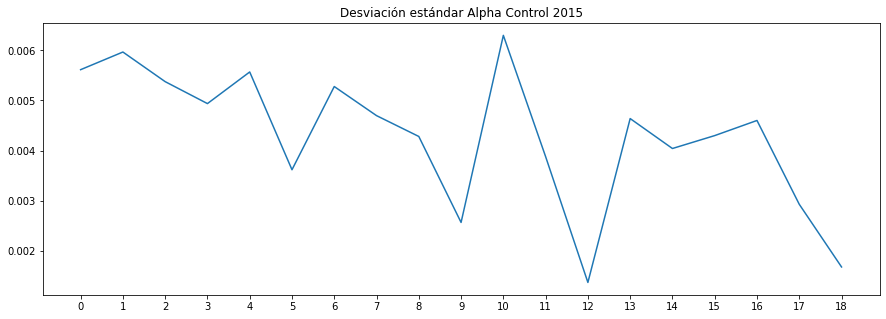

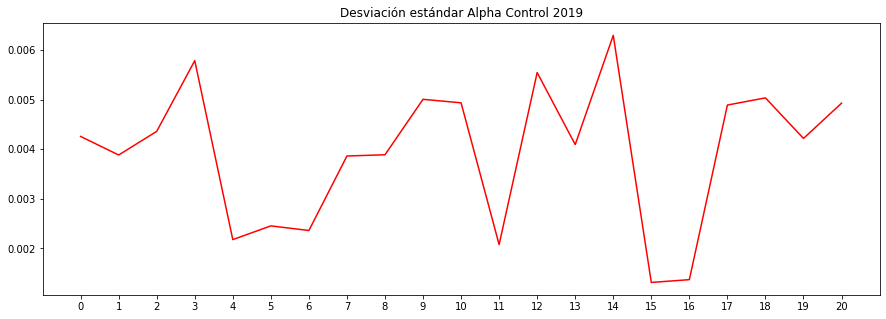

In [94]:
y = list(range(0, control2015_alpha.shape[0]))
z = list(range(0, control2019_alpha.shape[0]))

desvA = []
for i in (range(0,control2015_alpha.shape[0])):
  stdA = np.std(control2015_alpha.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto control 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,control2019_alpha.shape[0])):
  stdB = np.std(control2019_alpha.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto control 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Alpha Control 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Alpha Control 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

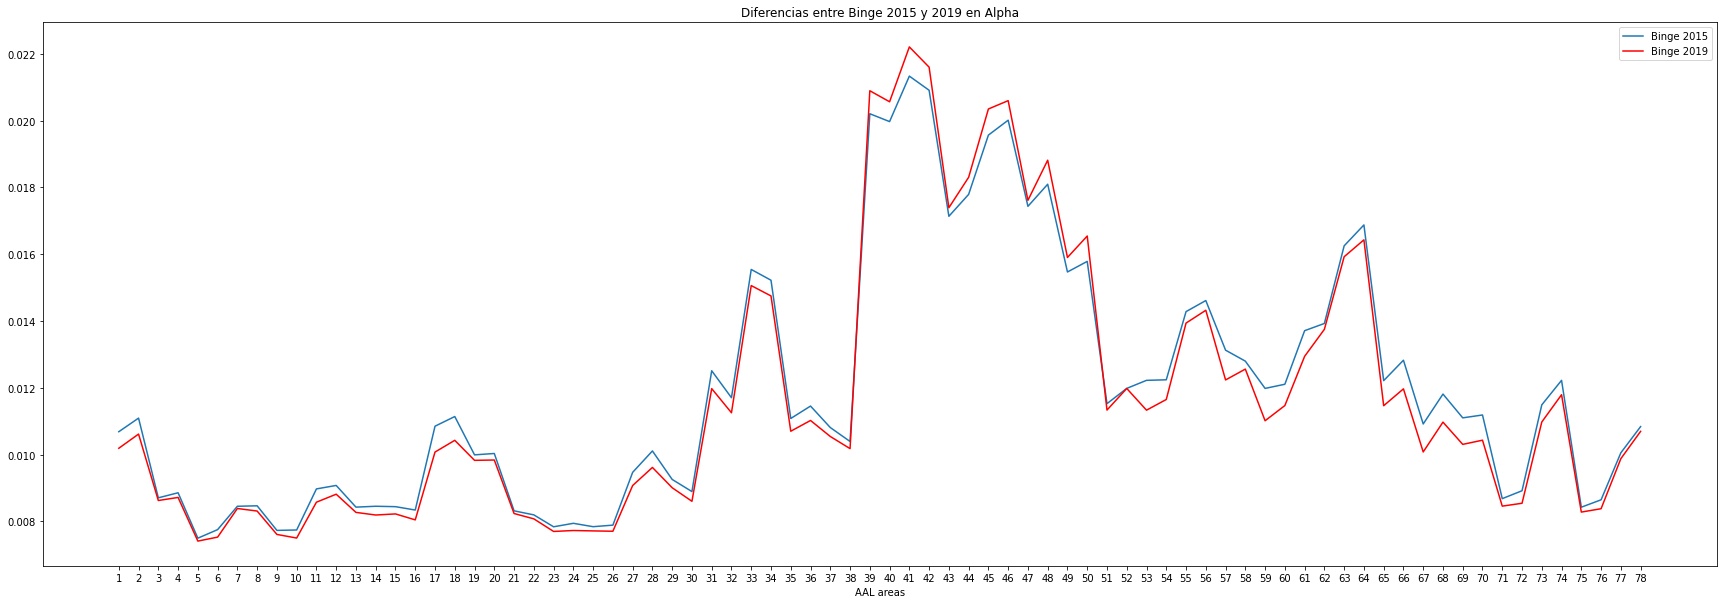

In [154]:
binge2015_alpha_mean.plot(figsize=(30,10))
binge2019_alpha_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Binge 2015', 'Binge 2019'])
plt.title('Diferencias entre Binge 2015 y 2019 en Alpha')
plt.show()

In [146]:
print('T-TEST DE DIFERENCIA ENTRE ALPHA BINGE 2015 Y ALPHA BINGE 2019\n')
interfer = 0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(binge2015_alpha.iloc[:,i], binge2019_alpha.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {binge2015_alpha.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE ALPHA BINGE 2015 Y ALPHA BINGE 2019

No hay diferencias entre ninguna de los areas


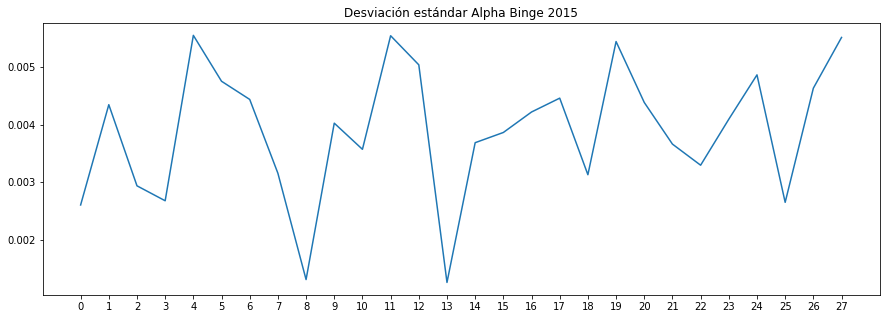

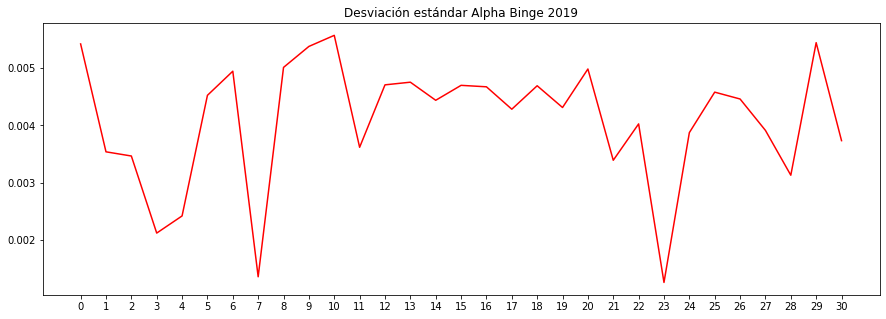

In [112]:
y = list(range(0, binge2015_alpha.shape[0]))
z = list(range(0, binge2019_alpha.shape[0]))

desvA = []
for i in (range(0,binge2015_alpha.shape[0])):
  stdA = np.std(binge2015_alpha.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto binge 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,binge2019_alpha.shape[0])):
  stdB = np.std(binge2019_alpha.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto binge 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Alpha Binge 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Alpha Binge 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

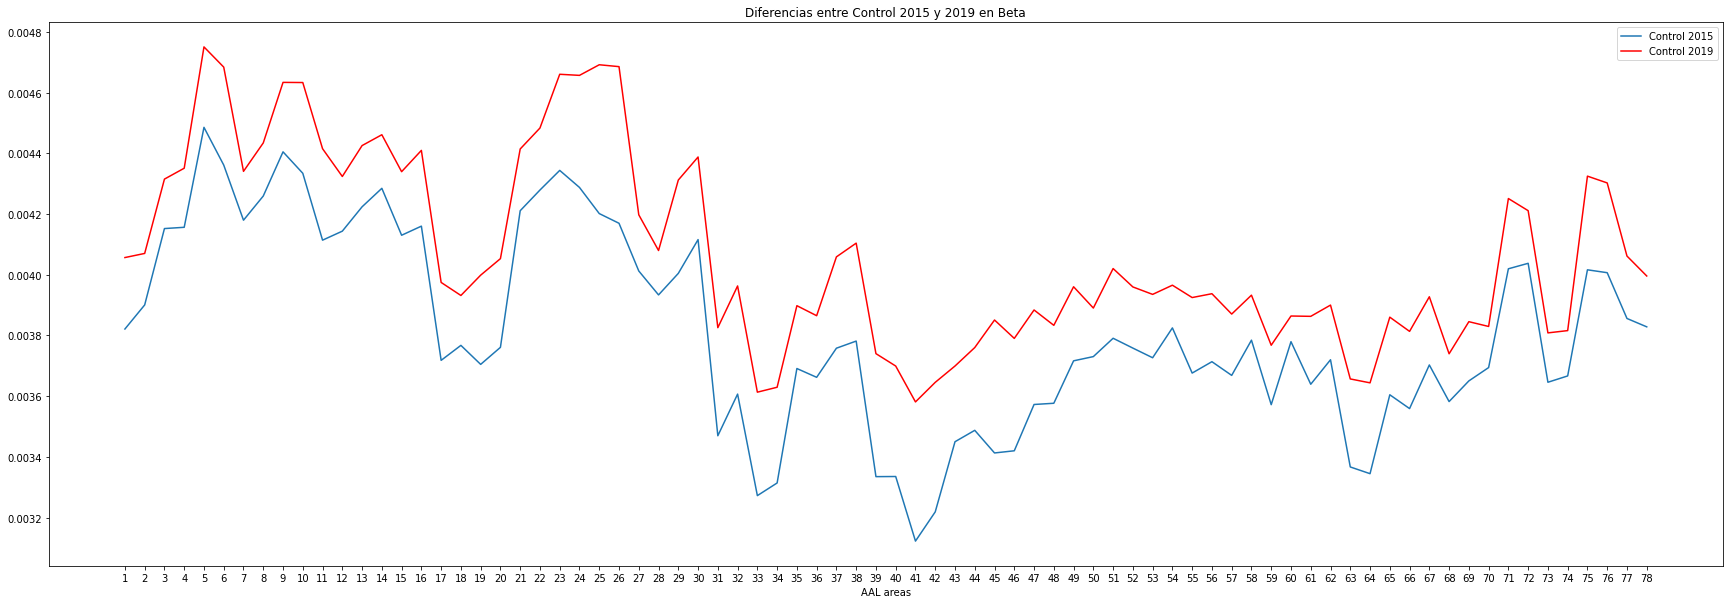

In [155]:
control2015_beta_mean.plot(figsize=(30,10))
control2019_beta_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Control 2015', 'Control 2019'])
plt.title('Diferencias entre Control 2015 y 2019 en Beta')
plt.show()

In [147]:
print('T-TEST DE DIFERENCIA ENTRE BETA CONTROL 2015 Y BETA CONTROL 2019\n')
interfer = 0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(control2015_beta.iloc[:,i], control2019_beta.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {control2015_beta.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE BETA CONTROL 2015 Y BETA CONTROL 2019

No hay diferencias entre ninguna de los areas


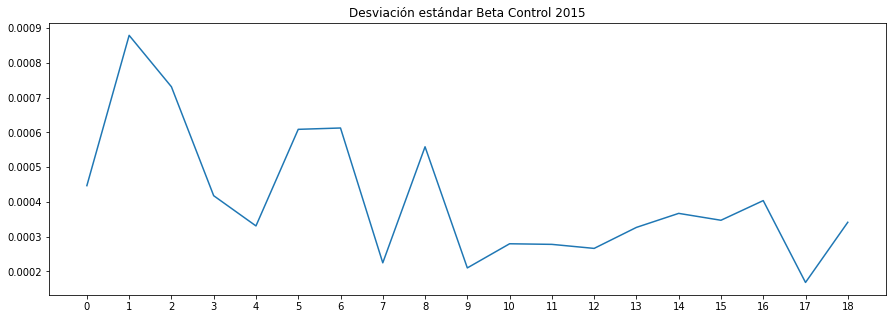

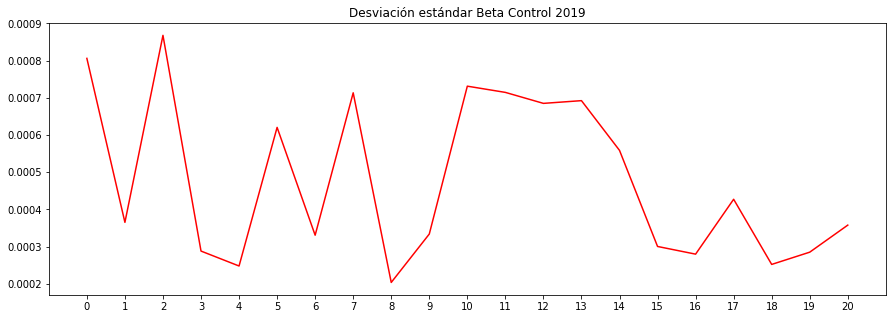

In [113]:
y = list(range(0, control2015_beta.shape[0]))
z = list(range(0, control2019_beta.shape[0]))

desvA = []
for i in (range(0,control2015_beta.shape[0])):
  stdA = np.std(control2015_beta.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto control 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,control2019_beta.shape[0])):
  stdB = np.std(control2019_beta.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto control 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Beta Control 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Beta Control 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

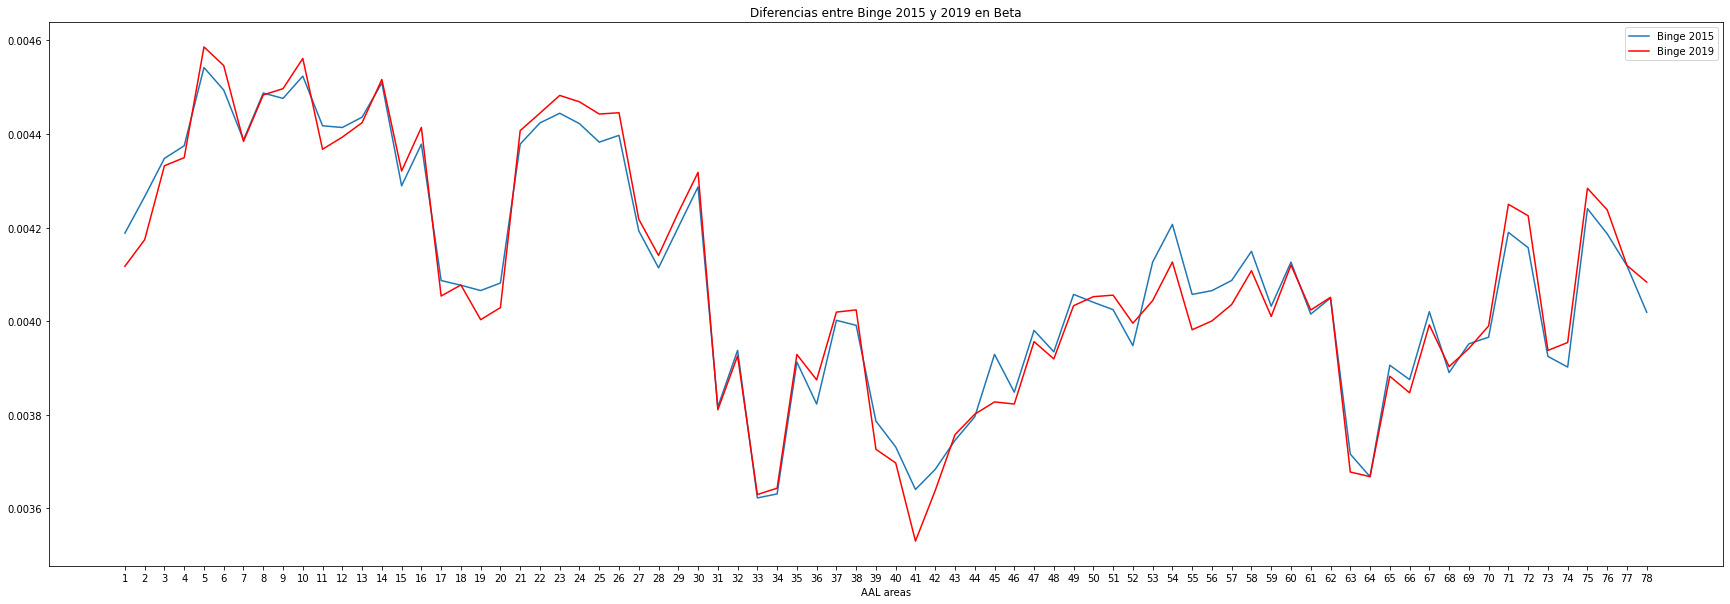

In [84]:
binge2015_beta_mean.plot(figsize=(30,10))
binge2019_beta_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Binge 2015', 'Binge 2019'])
plt.title('Diferencias entre Binge 2015 y 2019 en Beta')
plt.show()

In [148]:
print('T-TEST DE DIFERENCIA ENTRE BETA BINGE 2015 Y BETA BINGE 2019\n')
interfer=0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(binge2015_beta.iloc[:,i], binge2019_beta.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {binge2015_beta.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE BETA BINGE 2015 Y BETA BINGE 2019

No hay diferencias entre ninguna de los areas


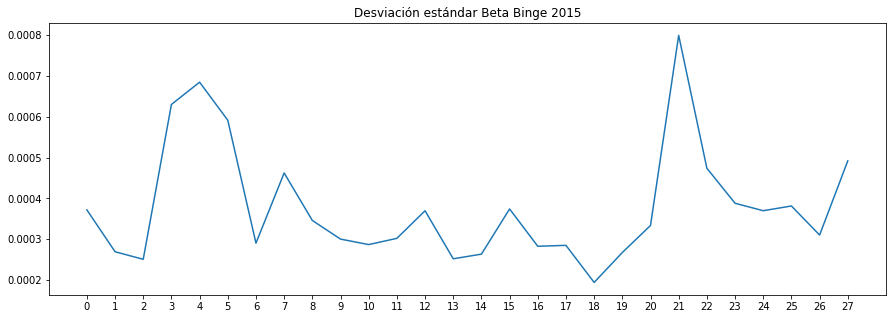

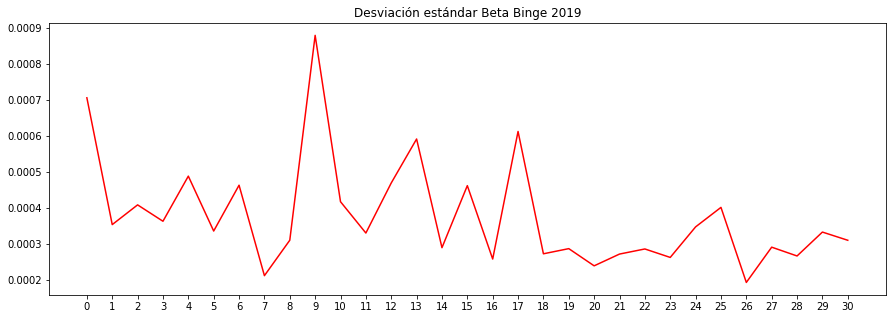

In [114]:
y = list(range(0, binge2015_beta.shape[0]))
z = list(range(0, binge2019_beta.shape[0]))

desvA = []
for i in (range(0,binge2015_beta.shape[0])):
  stdA = np.std(binge2015_beta.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto binge 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,binge2019_beta.shape[0])):
  stdB = np.std(binge2019_beta.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto binge 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Beta Binge 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Beta Binge 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

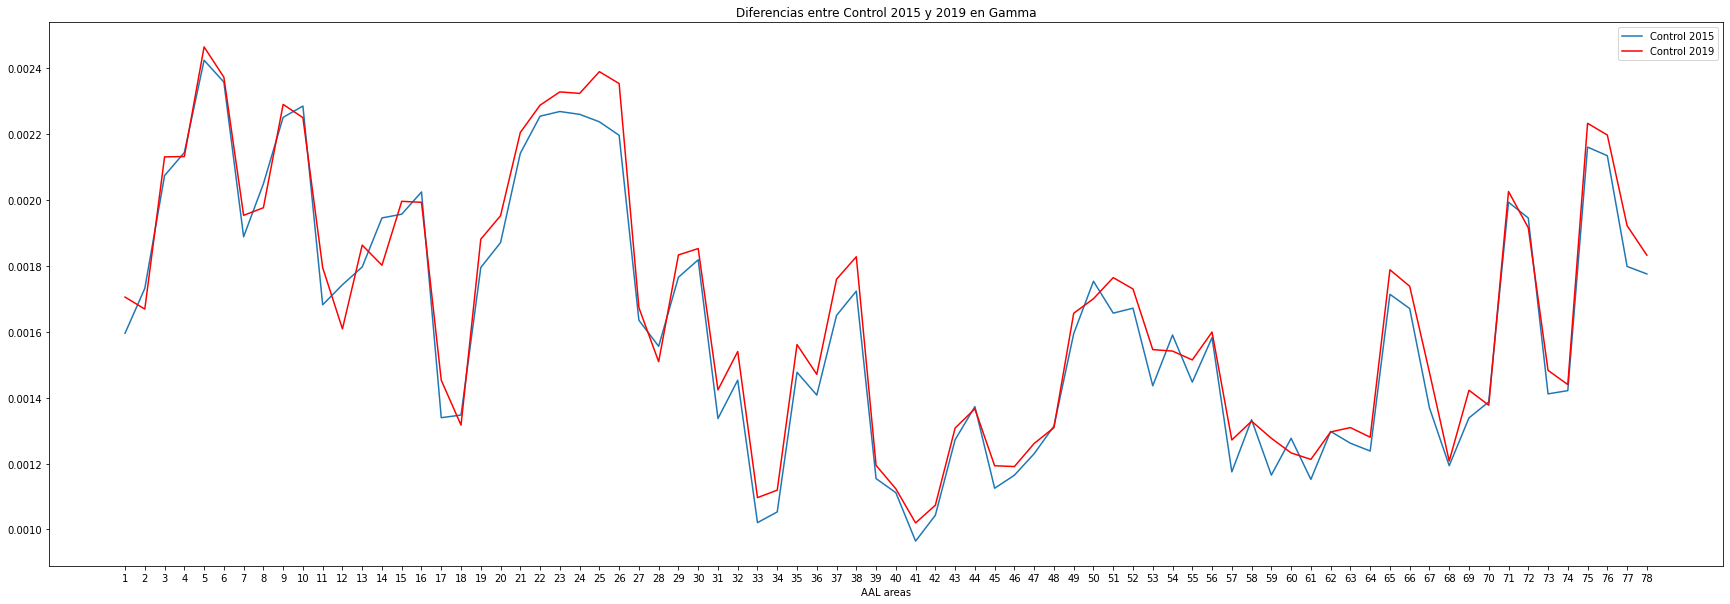

In [91]:
control2015_gamma_mean.plot(figsize=(30,10))
control2019_gamma_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Control 2015', 'Control 2019'])
plt.title('Diferencias entre Control 2015 y 2019 en Gamma')
plt.show()

In [149]:
print('T-TEST DE DIFERENCIA ENTRE GAMMA CONTROL 2015 Y GAMMA CONTROL 2019\n')
interfer=0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(control2015_gamma.iloc[:,i], control2019_gamma.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {control2015_gamma.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE GAMMA CONTROL 2015 Y GAMMA CONTROL 2019

No hay diferencias entre ninguna de los areas


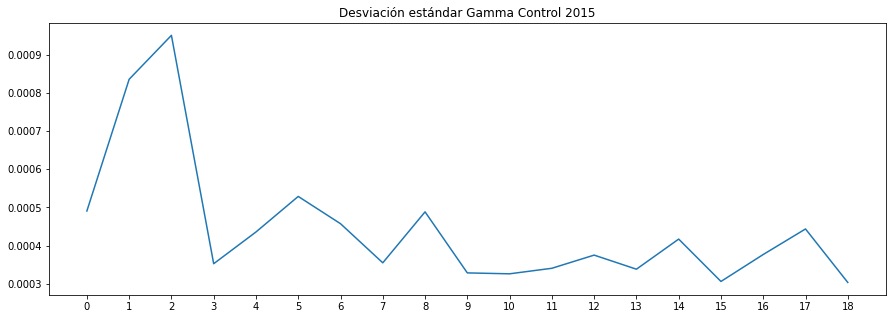

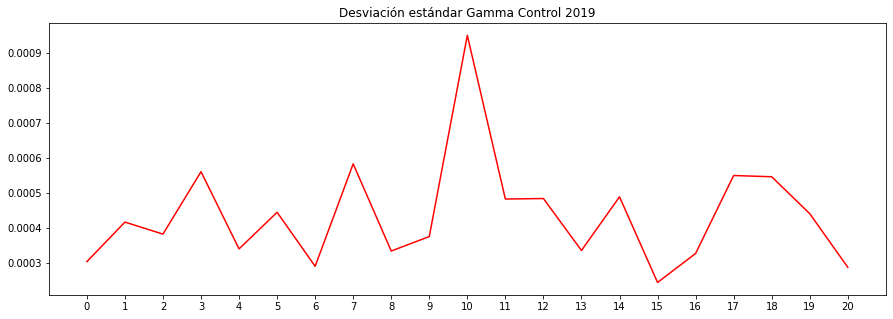

In [95]:
y = list(range(0, control2015_gamma.shape[0]))
z = list(range(0, control2019_gamma.shape[0]))

desvA = []
for i in (range(0,control2015_gamma.shape[0])):
  stdA = np.std(control2015_gamma.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto control 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,control2019_gamma.shape[0])):
  stdB = np.std(control2019_gamma.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto control 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Gamma Control 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Gamma Control 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

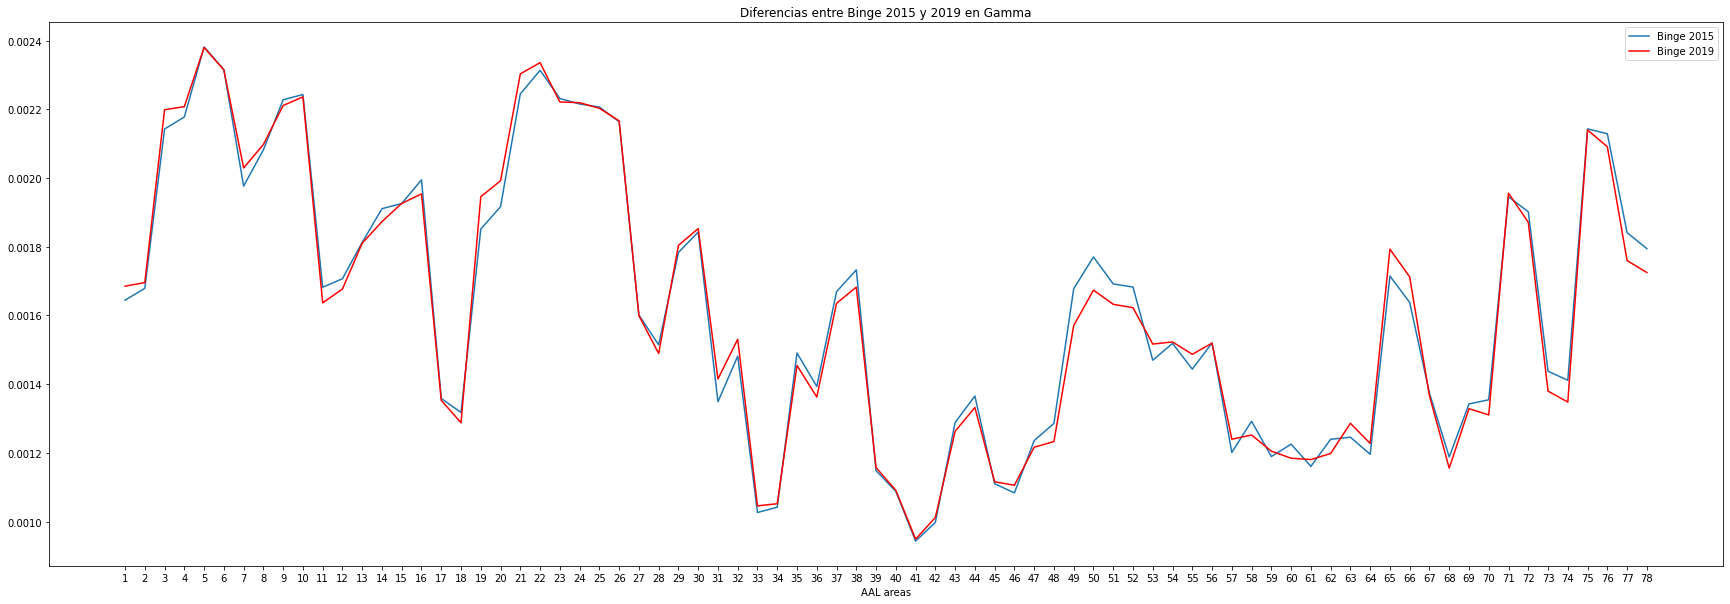

In [109]:
binge2015_gamma_mean.plot(figsize=(30,10))
binge2019_gamma_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Binge 2015', 'Binge 2019'])
plt.title('Diferencias entre Binge 2015 y 2019 en Gamma')
plt.show()

In [150]:
print('T-TEST DE DIFERENCIA ENTRE GAMMA BINGE 2015 Y GAMMA BINGE 2019\n')
interfer=0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(binge2015_gamma.iloc[:,i], binge2019_gamma.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {binge2015_gamma.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE GAMMA BINGE 2015 Y GAMMA BINGE 2019

No hay diferencias entre ninguna de los areas


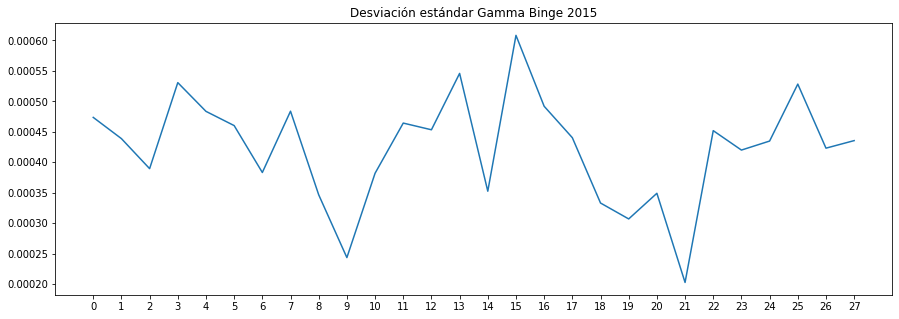

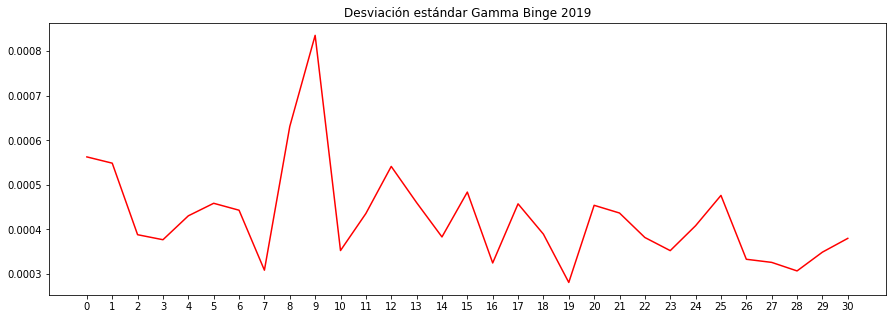

In [111]:
y = list(range(0, binge2015_gamma.shape[0]))
z = list(range(0, binge2019_gamma.shape[0]))

desvA = []
for i in (range(0,binge2015_gamma.shape[0])):
  stdA = np.std(binge2015_gamma.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto binge 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,binge2019_gamma.shape[0])):
  stdB = np.std(binge2019_gamma.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto binge 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Gamma Binge 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Gamma Binge 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

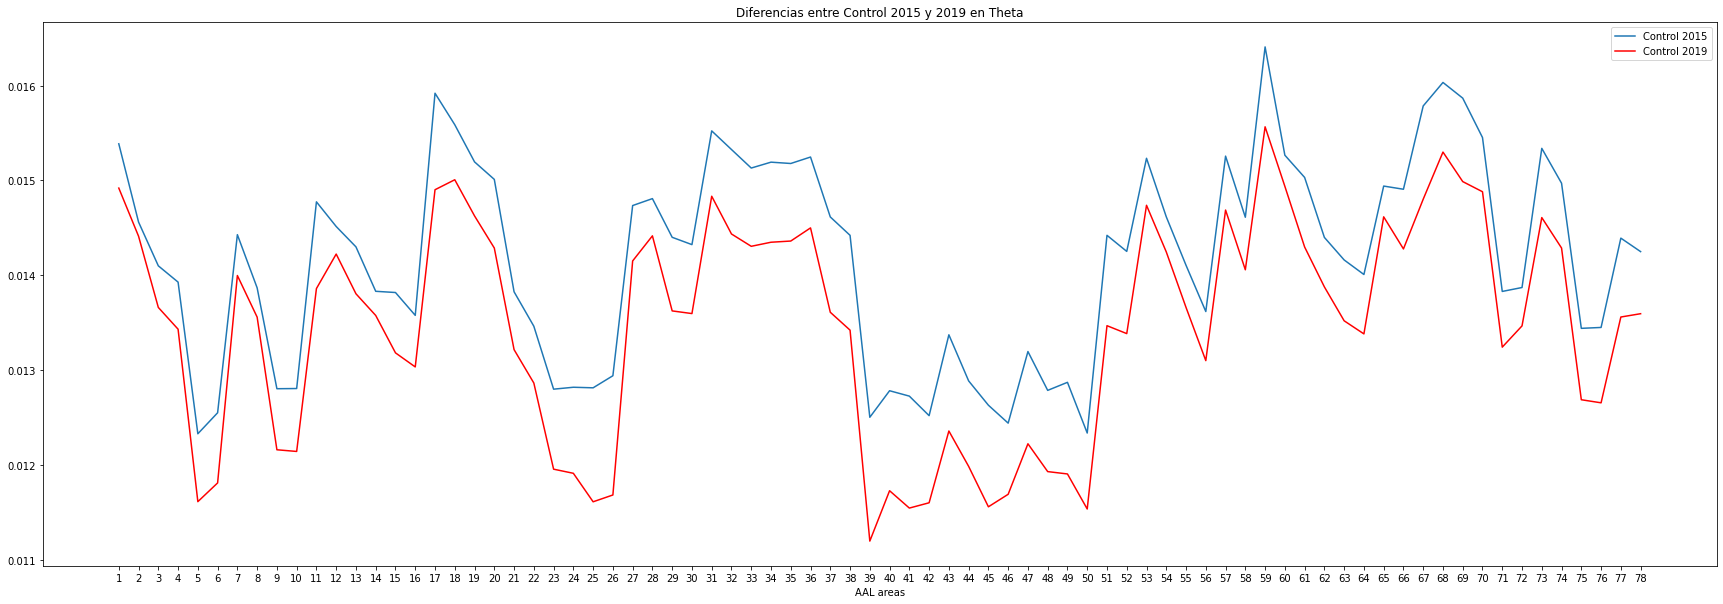

In [123]:
control2015_theta_mean.plot(figsize=(30,10))
control2019_theta_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Control 2015', 'Control 2019'])
plt.title('Diferencias entre Control 2015 y 2019 en Theta')
plt.show()

In [151]:
print('T-TEST DE DIFERENCIA ENTRE THETA CONTROL 2015 Y THETA CONTROL 2019\n')
interfer=0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(control2015_theta.iloc[:,i], control2019_theta.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {control2015_theta.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE THETA CONTROL 2015 Y THETA CONTROL 2019

No hay diferencias entre ninguna de los areas


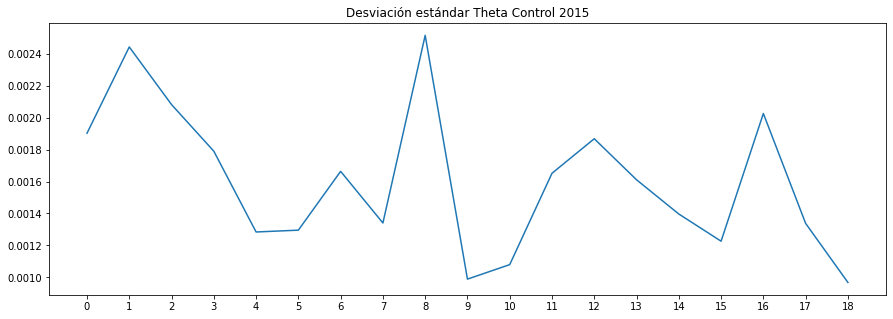

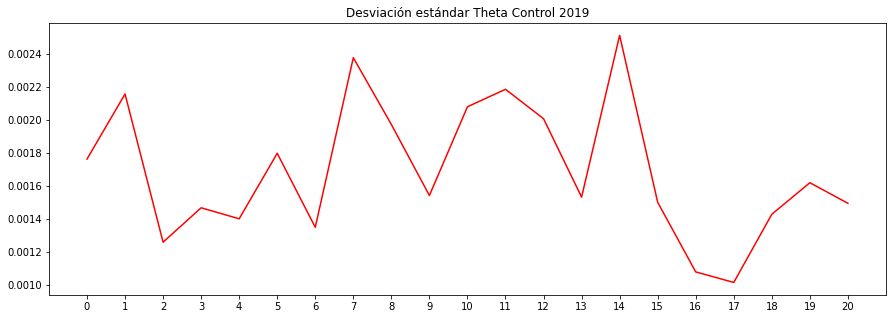

In [125]:
y = list(range(0, control2015_theta.shape[0]))
z = list(range(0, control2019_theta.shape[0]))

desvA = []
for i in (range(0,control2015_theta.shape[0])):
  stdA = np.std(control2015_theta.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto control 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,control2019_theta.shape[0])):
  stdB = np.std(control2019_theta.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto control 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Theta Control 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Theta Control 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()

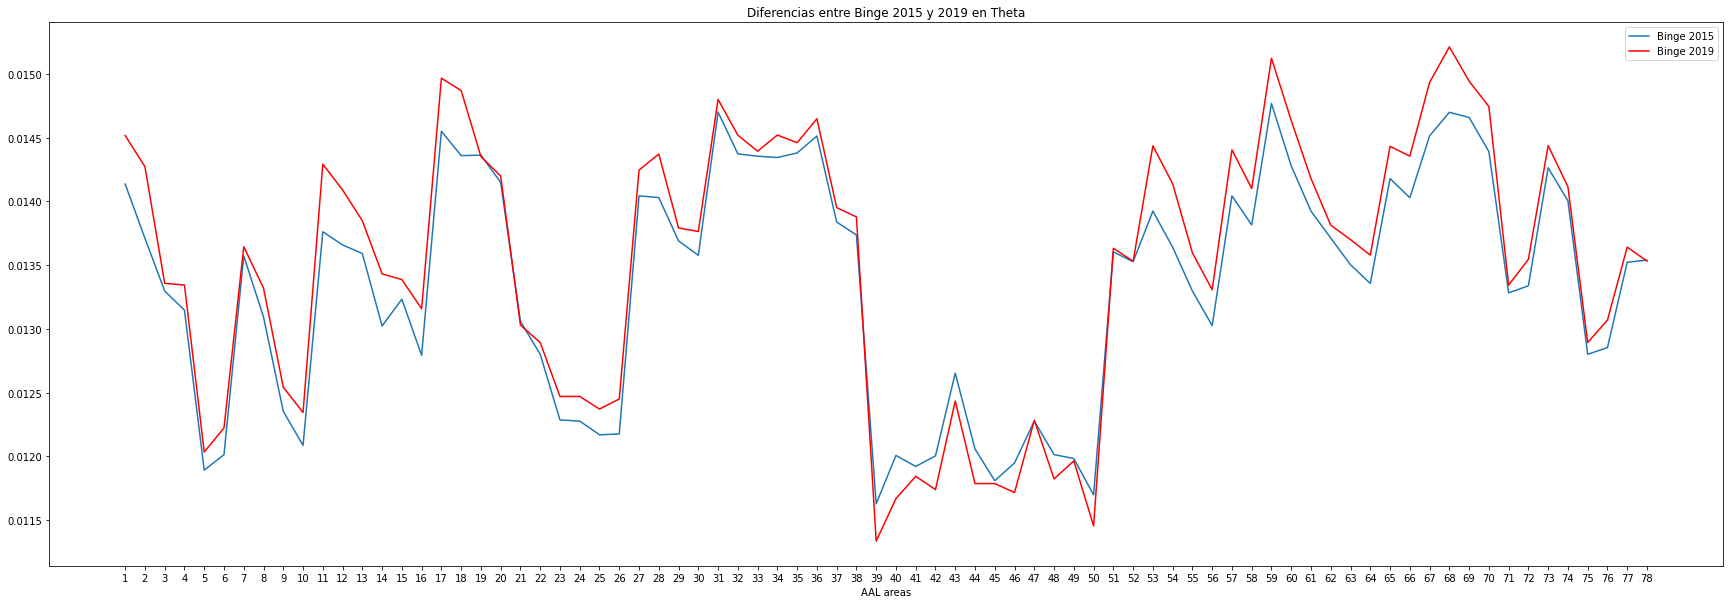

In [133]:
binge2015_theta_mean.plot(figsize=(30,10))
binge2019_theta_mean.plot(figsize=(30,10), color='red')
plt.xticks(x, labels, rotation ='horizontal')
plt.xlabel('AAL areas')
plt.legend(['Binge 2015', 'Binge 2019'])
plt.title('Diferencias entre Binge 2015 y 2019 en Theta')
plt.show()

In [152]:
print('T-TEST DE DIFERENCIA ENTRE THETA BINGE 2015 Y THETA BINGE 2019\n')
interfer=0
for i in list(range(0,78)):
  t_stat, p = ttest_ind(binge2015_theta.iloc[:,i], binge2019_theta.iloc[:,i])
  if (p<=0.05):
    print(f'The t-test for {binge2015_theta.iloc[:,i].name} area is : t_test={t_stat}, p={p}. ***')
    interfer=+1
if interfer == 0:
  print('No hay diferencias entre ninguna de los areas')

T-TEST DE DIFERENCIA ENTRE THETA BINGE 2015 Y THETA BINGE 2019

No hay diferencias entre ninguna de los areas


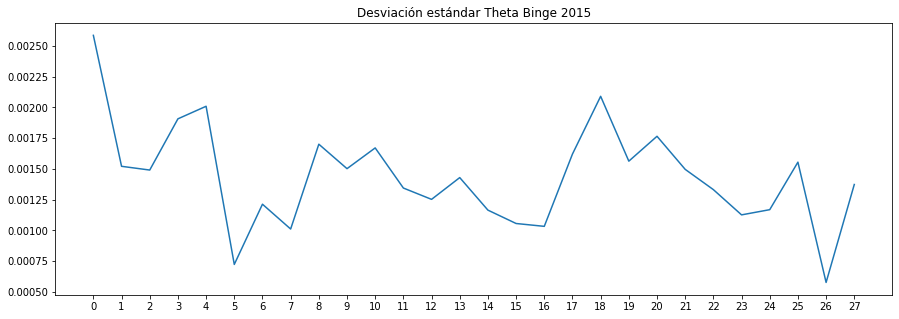

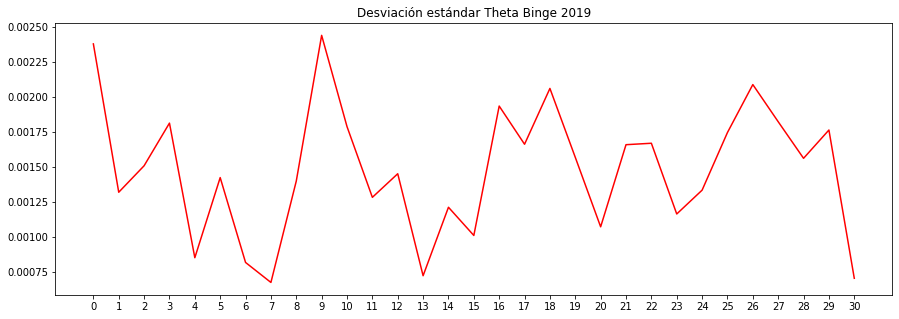

In [135]:
y = list(range(0, binge2015_theta.shape[0]))
z = list(range(0, binge2019_theta.shape[0]))

desvA = []
for i in (range(0,binge2015_theta.shape[0])):
  stdA = np.std(binge2015_theta.iloc[i, :])
  desvA.append(stdA)
  if stdA > 0.1:
    print(f'\n desviación estandar = {stdA} en sujeto binge 2015 {i}. Cuidao\n')

desvB = []
for i in (range(0,binge2019_theta.shape[0])):
  stdB = np.std(binge2019_theta.iloc[i, :])
  desvB.append(stdB)
  if stdB > 0.1:
    print(f'\n desviación estandar = {stdB} en sujeto binge 2019 {i}. Cuidao\n')

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvA)
plt.title('Desviación estándar Theta Binge 2015')
plt.xticks(y, y, rotation ='horizontal')
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(desvB, color='r')
plt.title('Desviación estándar Theta Binge 2019')
plt.xticks(z, z, rotation ='horizontal')
plt.show()